
Summary Statistics:
          Height      Weight        Age  Grip strength    Frailty
count  10.000000   10.000000  10.000000      10.000000  10.000000
mean   68.600000  131.900000  32.500000      26.000000   0.400000
std     1.670662   14.231811  12.860361       4.521553   0.516398
min    65.800000  112.000000  17.000000      19.000000   0.000000
25%    67.825000  120.750000  22.250000      22.500000   0.000000
50%    68.450000  136.000000  29.500000      27.000000   0.000000
75%    69.700000  141.750000  43.500000      29.750000   1.000000
max    71.500000  153.000000  51.000000      31.000000   1.000000

Correlation Matrix:
                   Height    Weight       Age  Grip strength  Frailty_encoded
Height           1.000000  0.571525 -0.032580      -0.167682              NaN
Weight           0.571525  1.000000  0.190926       0.032807              NaN
Age             -0.032580  0.190926  1.000000       0.133756              NaN
Grip strength   -0.167682  0.032807  0.133756       

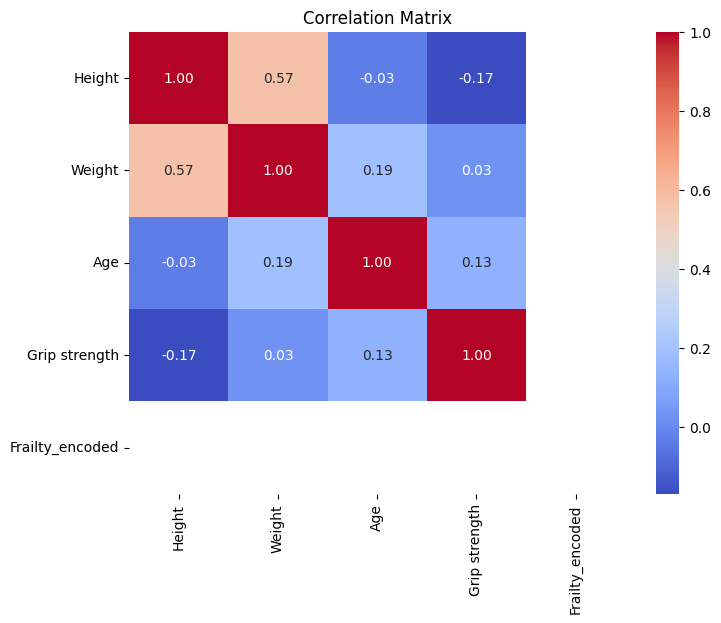


T-test Results:
T-statistic: nan
P-value: nan


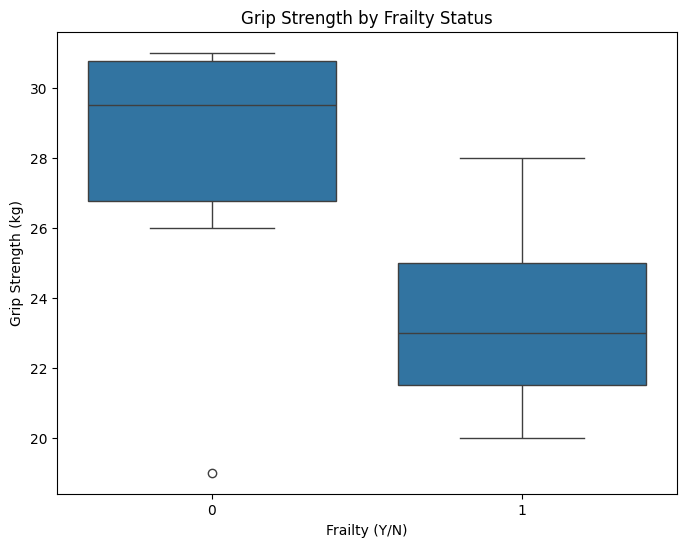

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Load the cleaned data
cleaned_data = pd.read_csv('/content/Data_clean/cleaned_data.csv')  # Use the correct path

# Step 2: Display the first few rows of the cleaned data
#print("Cleaned Data:")
#print(cleaned_data.head())

# Step 3: Summary statistics
print("\nSummary Statistics:")
print(cleaned_data.describe())

# Step 4: Encode the 'Frailty' column (convert 'Y' and 'N' to 1 and 0)
cleaned_data['Frailty_encoded'] = cleaned_data['Frailty'].map({'Y': 1, 'N': 0})

# Step 5: Correlation analysis (only numeric columns)
numeric_columns = ['Height', 'Weight', 'Age', 'Grip strength', 'Frailty_encoded']
correlation_matrix = cleaned_data[numeric_columns].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 6: Compare Grip Strength between Frail and Non-Frail Participants
frail = cleaned_data[cleaned_data['Frailty'] == 'Y']['Grip strength']
non_frail = cleaned_data[cleaned_data['Frailty'] == 'N']['Grip strength']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(frail, non_frail)
print(f"\nT-test Results:\nT-statistic: {t_stat}\nP-value: {p_value}")

# Step 7: Visualize Grip Strength by Frailty Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Frailty', y='Grip strength', data=cleaned_data)
plt.title("Grip Strength by Frailty Status")
plt.xlabel("Frailty (Y/N)")
plt.ylabel("Grip Strength (kg)")
plt.show()

# Step 8: Save analysis results (optional)
with open('/content/analysis_results.txt', 'w') as f:
    f.write("Summary Statistics:\n")
    f.write(cleaned_data.describe().to_string())
    f.write("\n\nCorrelation Matrix:\n")
    f.write(correlation_matrix.to_string())
    f.write("\n\nT-test Results:\n")
    f.write(f"T-statistic: {t_stat}\nP-value: {p_value}")
